In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'May 2018'

<h2>Основная таблица</h2>

In [6]:
rep_2017 = report['2017':] # данные за 2017 год
rep_2017

channels                            goals                       
             yandex google go.mail.ru  bry cpc order basket contact measure
2017-01-31     2949   3084        375  511   0     4    243     355       8
2017-02-28     2701   2414        282  486   0     8    197     311      14
2017-03-31     2590   2283        284  426   0    11    157     298      11
2017-04-30     1890   2390        243  395   0    10    123     260      31
2017-05-31     2006   2584        110  389   0     4    106     221      29
2017-06-30     2048   2164        154  407   0     7    137     182      24
2017-07-31     2218   2172        147  316   0     4     81     221      16
2017-08-31     1995   1892         98  191   0     1     67     197      31
2017-09-30     1767   1596         62  123   0    10    100     151      16
2017-10-31     2027   2004         58   35   0     8     84     193      14
2017-11-30     1930   1669         54   11   0     2     85     183      15
2017-12-31     2375   2035         45   11   0     2     89     110      11
2018-01-31     2477   1881         32    5   0     1     74     136      12
2018-02-28     2527   1625         44    7   0     3    121     130      16
2018-03-31     2568   1997         51    6   0    10     79     197      12
2018-04-30     2359   2410         74    5   0     1     56     129       9
2018-05-31     2166   2355         65    4   0     1     42     131      12

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [7]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-05-31     -193    -55         -9  -1   0     0    -14       2       3

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

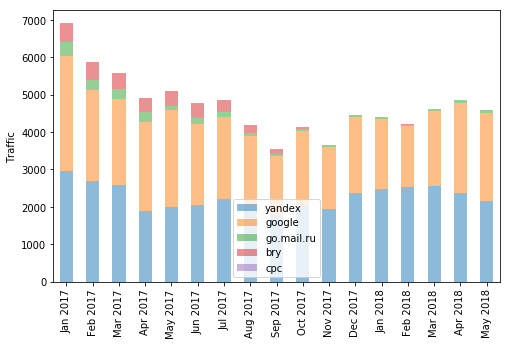

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2017.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
#fig.autofmt_xdate()
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2017.index]);

<h3>Линейная диаграмма изменений трафика</h3>

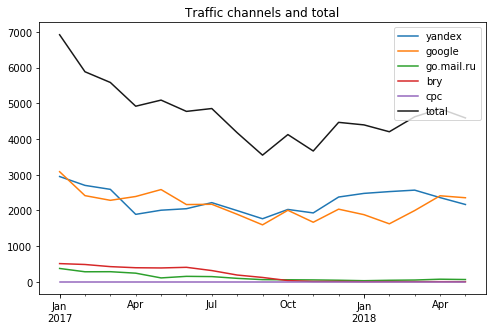

In [9]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2017.channels.plot(ax=ax);
rep_2017.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [10]:
kw = 'keyword visit'.split()

In [11]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing       0                                                np - /      1
           1                              np - /?cnt=catalog&r=300      1
go.mail.ru 0                                             (not set)     65
google     0                                       двери из дерева    247
           1                                         дешевые двери    224
           2                                          двери дешево    171
           3                             np - /?cnt=catalog&r=2438    128
           4                                      np - /?pid=pokaz     83
           5                                                np - /     73
           6                             np - /?cnt=catalog&r=1428     68
           7                                         двери продажа     62
           8                                         двери полотно     14
           9                                     полотно для двери     13
           10                             np - /?cnt=catalog&r=999     10
           11                              np - /?pid=menu-katalog      8
           12                             np - /?cnt=catalog&r=155      6
           13                               дверное полотно дешево      6
           14                                 дверное полотно цена      6
           15                               дверные полотна купить      6
           16                                        полотно двери      5
           17                            np - /?cnt=catalog&r=2555      4
           18                                  np - /?pid=dostavka      4
           19                             np - /?cnt=catalog&r=114      3
           20                            np - /?cnt=catalog&r=1792      3
           21                                   np - /?pid=contact      3
           22                                      недорогие двери      3
           23                            np - /?cnt=catalog&r=1010      2
           24                            np - /?cnt=catalog&r=1318      2
           25                            np - /?cnt=catalog&r=1429      2
           26                             np - /?cnt=catalog&r=300      2
...                                                            ...    ...
yandex     1801            двери ульяновские барселона белый эмаль      1
           1802                           двери утопленное полотно      1
           1803                         двери фараон 2 белая эмаль      1
           1804                             двери фасады для кухни      1
           1805                                 двери фасады кухни      1
           1806                                   двери фолк эмаль      1
           1807  двери форис серия амстердам 2 дуб белая эмаль ...      1
           1808                      двери форпост дверное полотно      1
           1809                              двери цельное полотно      1
           1810                                  двери челси эмаль      1
           1811                    двери честер белая эмаль купить      1
           1812                      двери честер эмаль белая фото      1
           1813                          двери честер эмаль отзывы      1
           1814  двери шимо светлый дверное полотно пг шимо све...      1
           1815  двери широкие со стеклом дверь на кухню со сте...      1
           1816  двери шпон в лаке глянец двери из италии совре...      1
           1817  двери шпон в лаке глянец плита мдф и ее финишн...      1
           1818                               двери шпон или эмаль      1
           1819                                   двери шпон эмаль      1
           1820                      двери шпонированные под эмаль      1
           1821  двери щелково как правильно выбрать модель на ...      1
           1822  двери эко шпон или эмаль в неотапливаемом поме...      1
           1823                            двери экошпон или эм

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [12]:
data[kw].xs(0, level=1)

,keyword,visit
bing,np - /,1
go.mail.ru,(not set),65
google,двери из дерева,247
rambler,верда модель джаз эмаль белая,1
yahoo,np - /?cnt=catalog&r=2438,2
yandex,(not set),149


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [13]:
data_grupped = data.sort_values('visit', ascending=False).groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.iloc[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                           np - /      1
           1         np - /?cnt=catalog&r=300      1
go.mail.ru 0                        (not set)     65
google     0                  двери из дерева    247
           1                    дешевые двери    224
           2                     двери дешево    171
           3        np - /?cnt=catalog&r=2438    128
           4                 np - /?pid=pokaz     83
rambler    0    верда модель джаз эмаль белая      1
           1  купить дверное полотно 2300х900      1
yahoo      0        np - /?cnt=catalog&r=2438      2
yandex     0                        (not set)    149
           1                  дверное полотно     22
           2        дверь на кухню со стеклом     11
           3                   дверь на кухню      9
           5        двери на кухню со стеклом      7